In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
data=pd.read_csv("/home/hammadali08/Vidoes/CSV file/Job Placement Dataset.csv")
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [127]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(drop='first')
df=pd.DataFrame(one.fit_transform(data[['status']]).toarray())

In [128]:
data['status']=df

In [129]:
st=data['status'].astype('int64')
st

0      1
1      1
2      1
3      0
4      1
      ..
209    1
210    1
211    1
212    1
213    0
Name: status, Length: 214, dtype: int64

In [130]:
data['status']=st
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,1
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1


<function matplotlib.pyplot.show(close=None, block=None)>

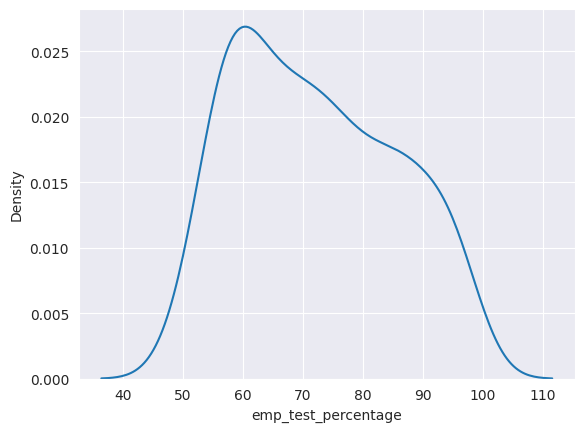

In [63]:
sns.kdeplot(data['emp_test_percentage'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

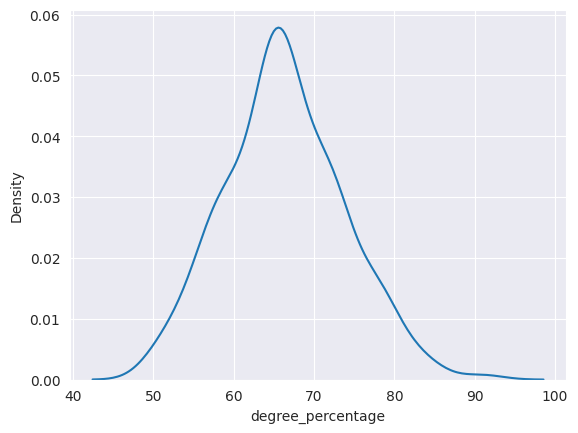

In [64]:
sns.kdeplot(data['degree_percentage'])
plt.show

Both the value seems Normal Distribution, So GUSSIAN NAive Bayes will work in here

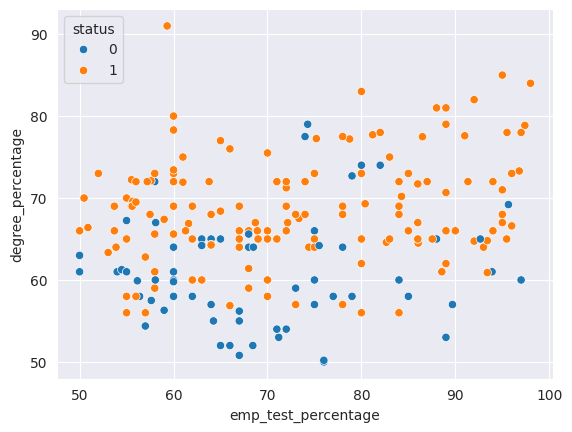

In [65]:
sns.scatterplot(x="emp_test_percentage",y="degree_percentage",data=data,hue="status")
plt.show()

In [66]:
x=data[['emp_test_percentage', 'degree_percentage']]
y=data['status']

In [67]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [112]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [113]:
gsn=GaussianNB()
gsn.fit(x_train,y_train)

GaussianNB()

In [114]:
gsn.score(x_test,y_test),gsn.score(x_train,y_train)

(0.7209302325581395, 0.7660818713450293)

In [72]:
 from mlxtend.plotting import plot_decision_regions

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


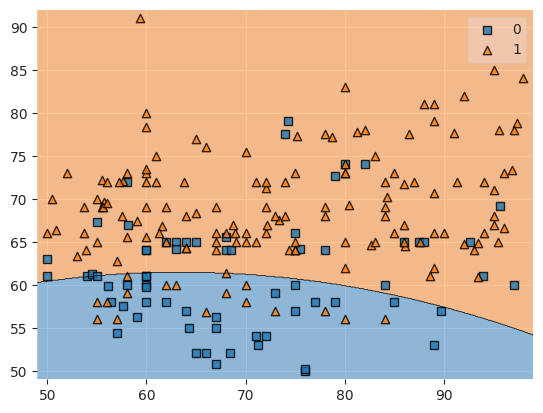

In [73]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=gsn)
plt.show()

In [75]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [76]:
mnb.score(x_test,y_test)

0.627906976744186

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


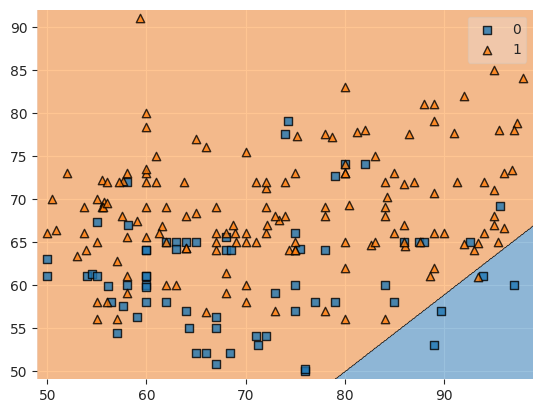

In [77]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=mnb)
plt.show()

In [79]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [80]:
bnb.score(x_test,y_test)

0.6046511627906976

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


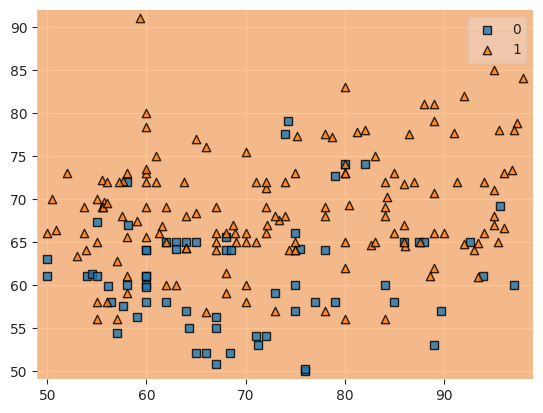

In [82]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=bnb)
plt.show()

# Will try again after Function transformation to Normal Distribution

In [83]:
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,1
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,1
212,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,1


In [84]:
from sklearn.preprocessing import FunctionTransformer

In [85]:
ft=FunctionTransformer(np.log)

In [86]:
ft.fit(data[['emp_test_percentage']])

FunctionTransformer(func=<ufunc 'log'>)

In [90]:
ft.fit(data[['degree_percentage']])

FunctionTransformer(func=<ufunc 'log'>)

In [97]:
data['emp_test_percentage']=ft.transform(data[['emp_test_percentage']])

In [98]:
data['degree_percentage']=ft.transform(data[['degree_percentage']])

In [99]:
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,1.401292,Sci&Tech,No,1.388126,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,1.470180,Sci&Tech,Yes,1.495181,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,1.425247,Comm&Mgmt,No,1.462674,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,1.374030,Sci&Tech,No,1.432618,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,1.457349,Comm&Mgmt,No,1.520092,Mkt&Fin,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,1.428968,Comm&Mgmt,No,1.436201,Mkt&Fin,56.49,1
210,M,80.60,Others,82.00,Others,Commerce,1.470536,Comm&Mgmt,No,1.506488,Mkt&Fin,74.49,1
211,M,58.00,Others,60.00,Others,Science,1.453174,Sci&Tech,No,1.459560,Mkt&Fin,53.62,1
212,F,74.00,Others,66.00,Others,Commerce,1.401292,Comm&Mgmt,No,1.446565,Mkt&HR,60.23,1


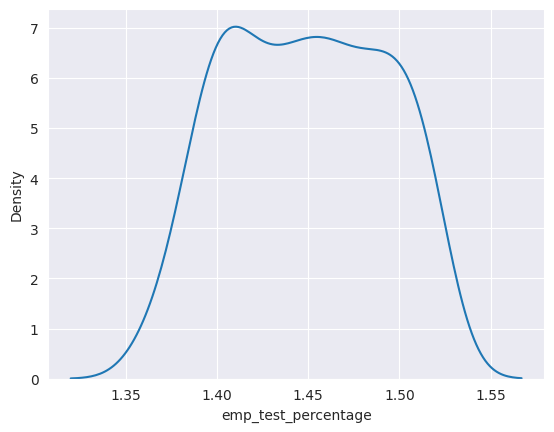

In [100]:
sns.kdeplot(data['emp_test_percentage'])
plt.show()

<Axes: xlabel='degree_percentage', ylabel='Density'>

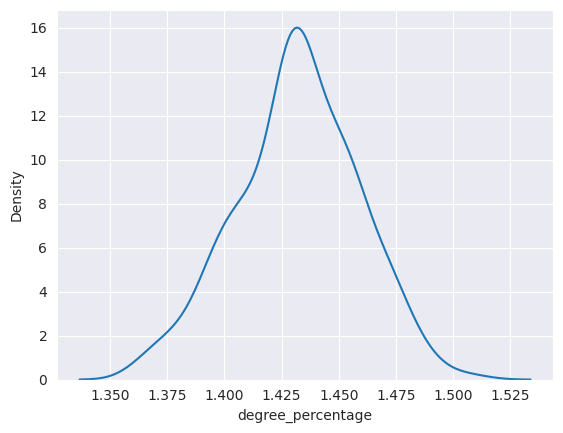

In [101]:
sns.kdeplot(data['degree_percentage'])

In [102]:
x1=data[['emp_test_percentage', 'degree_percentage']]
y1=data['status']

In [107]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,train_size=0.2,random_state=46)

In [108]:
gsn=GaussianNB()
gsn.fit(x1_train,y1_train)

GaussianNB()

In [109]:
gsn.score(x1_test,y1_test)

0.7674418604651163

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


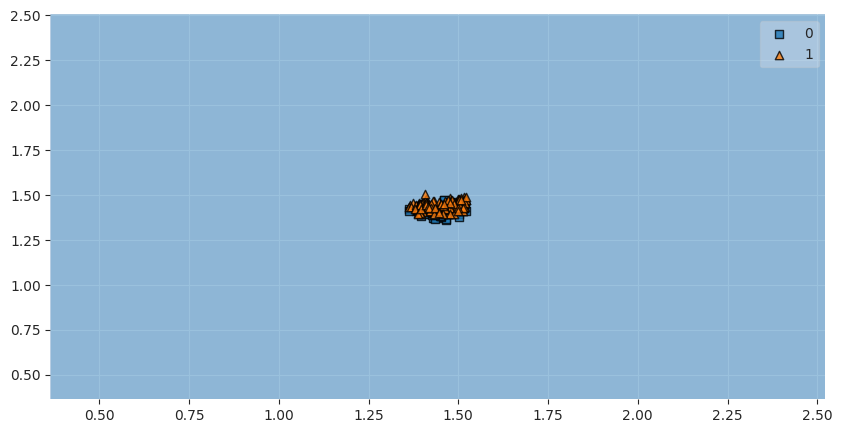

In [119]:
plt.figure(figsize=(10,5))
plot_decision_regions(x1.to_numpy(),y1.to_numpy(),clf=gsn)
plt.show()

# With 3 input values

In [131]:
x2=data[['emp_test_percentage', 'degree_percentage','hsc_percentage']]
y2=data['status']

In [132]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,train_size=0.2,random_state=46)

In [133]:
gsn.fit(x2_train,y2_train)

GaussianNB()

In [134]:
gsn.score(x2_test,y2_test)

0.8023255813953488